<h1>Project: Internet Demographic Data Analysis</h1>
<h3>Analyst: Jiro Miko S. Viñas</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')

In [3]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [6]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Country Code'] = internet['Country Code'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country Name    195 non-null    category
 1   Country Code    195 non-null    category
 2   Birth rate      195 non-null    float64 
 3   Internet users  195 non-null    float64 
 4   Income Group    195 non-null    category
dtypes: category(3), float64(2)
memory usage: 15.5 KB


<h1> 1. Distribution of Birth Rates</h2>

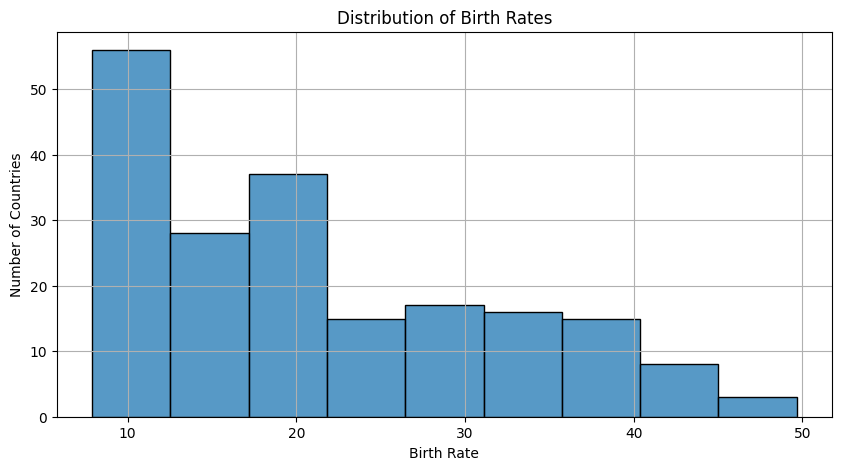

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(internet["Birth rate"])
plt.xlabel("Birth Rate")
plt.ylabel("Number of Countries")
plt.title("Distribution of Birth Rates")
plt.grid(True)
plt.show()

<h1>2. Tap 5 Countries with the Highest Internet Usage</h2>

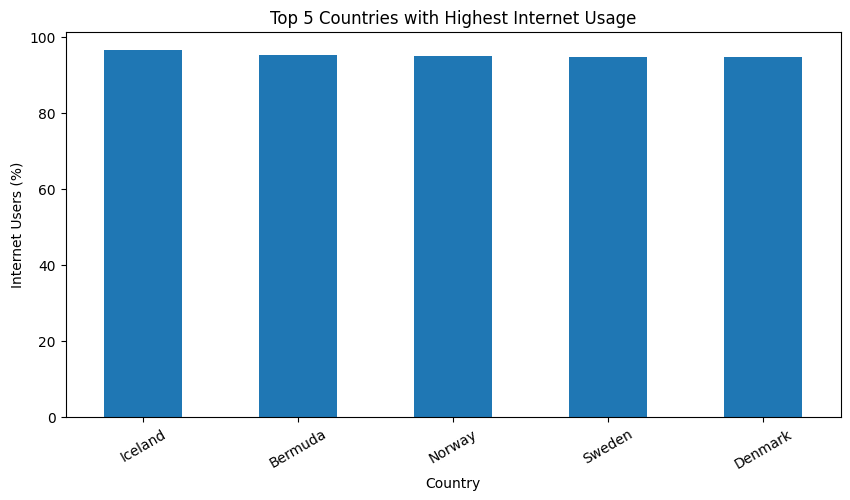

In [9]:
top_5_internet = internet.groupby("Country Name")["Internet users"].max().nlargest(5)
plt.figure(figsize=(10, 5))
top_5_internet.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Internet Users (%)")
plt.title("Top 5 Countries with Highest Internet Usage")
plt.xticks(rotation=30)
plt.show()

<h1>The Top 5 Countries with Highest Internet Usage are Iceland, Bermuda, Norway, Sweden, Denmark</h1>

<h1>3. Count of Countries by Income Group</h1>

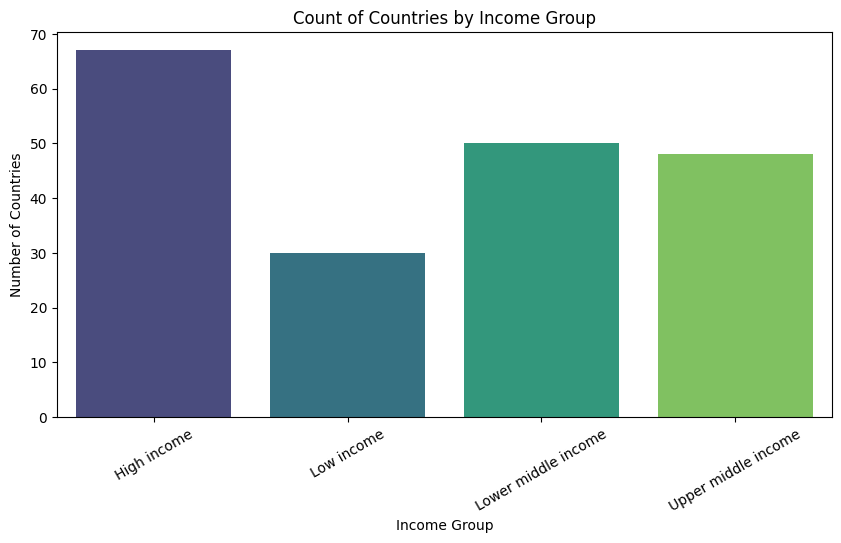

In [10]:
income_group_counts = internet["Income Group"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=income_group_counts.index, y=income_group_counts.values, palette="viridis")
plt.xlabel("Income Group")
plt.ylabel("Number of Countries")
plt.title("Count of Countries by Income Group")
plt.xticks(rotation=30)
plt.show()

<h1>Most of the country are belong to the High Income Group</h1>

<h1>4. Box plot of Internet Usage(Optional)</h1>

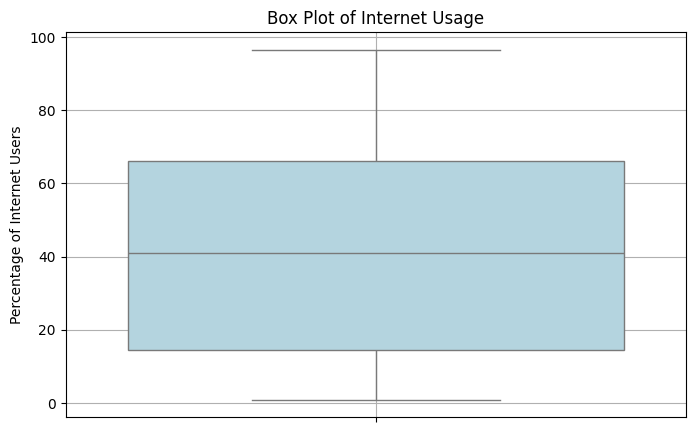

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=internet["Internet users"], color="lightblue")
plt.ylabel("Percentage of Internet Users")
plt.title("Box Plot of Internet Usage")
plt.grid(True)
plt.show()

<h1>5. Countries with No Internet Access</h1>

In [12]:
int_user = internet[internet['Internet users'] == 0].value_counts()
int_user

Series([], Name: count, dtype: int64)

<h1>There are No Countries that No Internet Access</h1>

<h1>6. Average Birth Rate</h1>

In [23]:
average_birth_rate = internet["Birth rate"].mean()
average_birth_rate

21.469928205128202

<h1>The Average Birth Rate to all countries is 21.47</h1>

<h1>7. Scatter Plot: Birth Rate vs. Internet Usage</h1>

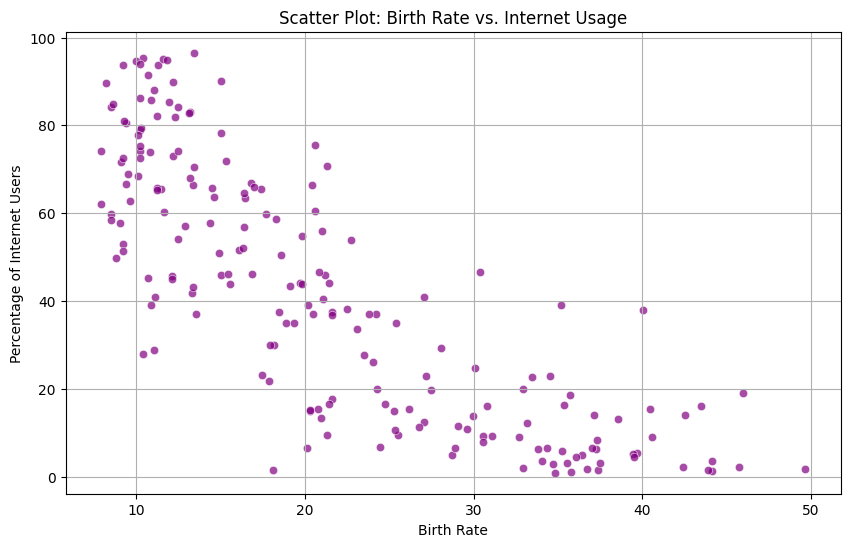

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=internet["Birth rate"], y=internet["Internet users"], color="purple", alpha=0.7)
plt.xlabel("Birth Rate")
plt.ylabel("Percentage of Internet Users")
plt.title("Scatter Plot: Birth Rate vs. Internet Usage")
plt.grid(True)
plt.show()

<h1>8. Countries with Birth Rates Above 40</h1>

In [19]:
high_birth_countries = internet[internet['Birth rate'] > 40][['Country Name', 'Birth rate']]
high_birth_countries

,Country Name,Birth rate
2,Angola,45.985
11,Burundi,44.151
14,Burkina Faso,40.551
65,"Gambia, The",42.525
115,Mali,44.138
127,Niger,49.661
128,Nigeria,40.045
156,Somalia,43.891
167,Chad,45.745
178,Uganda,43.474


<h1>The Countries with Birth Rates Above 40 are Angola, Burundi, Burkina Faso, Gambia, The, Mali, Niger, Nigeria, Somalia, Chad, Uganda, Congo, Dem. Rep., Zambia</h1>

<h1>9. Pie Chart of income Groups</h1>

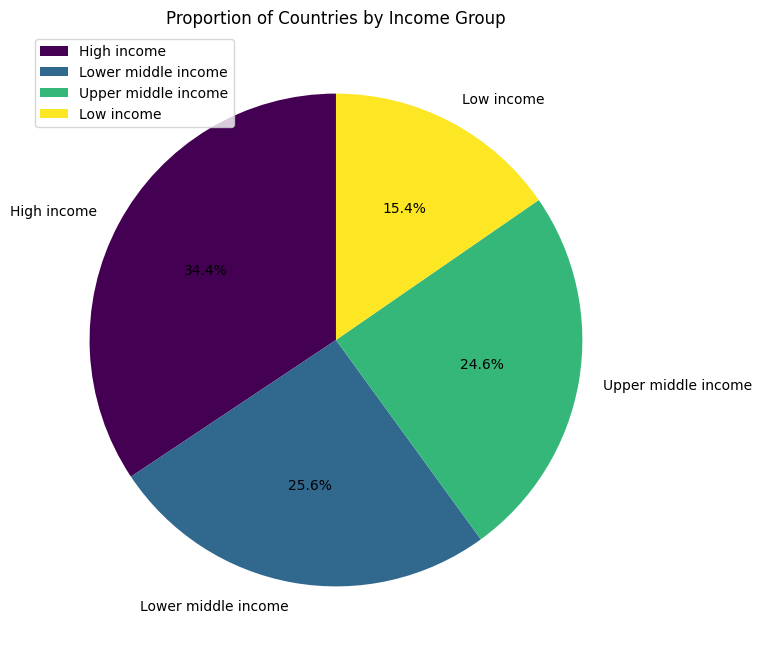

In [24]:
income_group_counts = internet["Income Group"].value_counts()
plt.figure(figsize=(8, 8))
income_group_counts.plot(kind='pie', autopct='%1.1f%%', cmap='viridis', startangle=90, legend=True)
plt.ylabel('')
plt.title("Proportion of Countries by Income Group")
plt.show()

<h1>The proportion of countries by income group is as follows: High Income Group - 34.4%, Upper Middle Income Group - 24.6%, Lower Middle Income Group - 25.6%, and Low Income Group - 15.4%</h1>

<h1>10. Correlation Between Birth Rates and Internet Usage</h1>

In [25]:
corr = internet['Birth rate'].corr(internet['Internet users'])
corr

-0.8155885551284763

<h1>The correlation between birth rates and internet usage is -0.82 it indicates a strong negative relationship</h1>